# SHORE ASSIGNMENT: 
## Task-1
Please download the Credit Dataset from this link (https://docs.google.com/spreadsheets/d/1vQkiU0kdpS404gOLgBHuiQTHmyto_Qcj/edit#gid=706573814) and explores the dataset, telling a story and bringing out actionable insights.

*****

### Importing necessary libraries and loading the dataset

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# CSV file is storred in local machine in the name UCI_Credit_Card_Default.csv
credit = pd.read_csv('UCI_Credit_Card_Default.csv')
credit.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Exploratory Data Analysis (EDA)

Next, we perform exploratory data analysis to gain insights into the data. We can start by checking the shape of the dataset, the data types of columns, and the number of missing values.

In [100]:
# Shape of the dataset
print("The shape of the dataset is: ", credit.shape)

# Ddata types of columns
print("The data types of columns are: \n", credit.dtypes)


The shape of the dataset is:  (30000, 25)
The data types of columns are: 
 ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payme

In [101]:
# Double check the number of missing values, if any
print("The number of missing values in each column are: \n", credit.isnull().sum())

The number of missing values in each column are: 
 ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


### Data Cleaning

From the above step, we can see that there are no missing values in the dataset. However, we need to convert some columns into categorical variables and rename the columns to make them more understandable.

In [102]:
# Convertng categorical colmns to category data type
credit['SEX'] = credit['SEX'].astype('category')
credit['EDUCATION'] = credit['EDUCATION'].astype('category')
credit['MARRIAGE'] = credit['MARRIAGE'].astype('category')

# Renaming columns for better intuition
credit.rename(columns={'PAY_0': 'PAY_SEP', 'PAY_2': 'PAY_AUG', 'PAY_3': 'PAY_JUL', 'PAY_4': 'PAY_JUN',
                       'PAY_5': 'PAY_MAY', 'PAY_6': 'PAY_APR', 'default.payment.next.month': 'DEFAULT'}, inplace=True)

credit.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Data Visualization

We can use various data visualization techniques to gain insights into the data. 

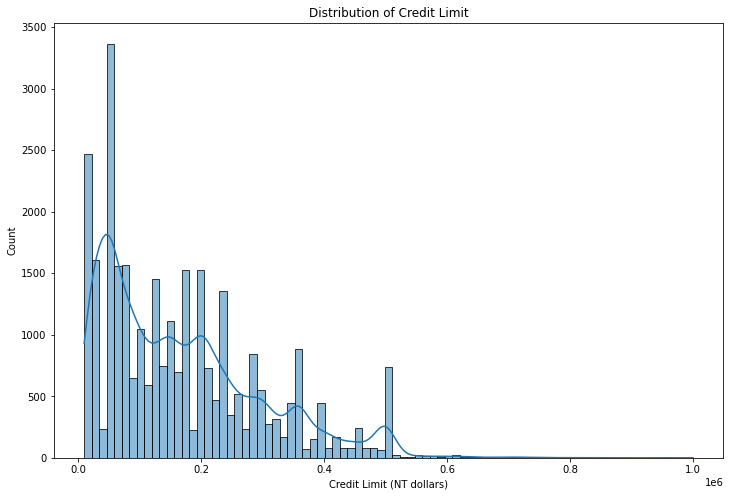

In [103]:
# Distribution of the LIMIT_BAL column.
plt.figure(figsize=(12,8))
sns.histplot(data=credit, x='LIMIT_BAL', kde=True)
plt.title("Distribution of Credit Limit")
plt.xlabel("Credit Limit (NT dollars)")
plt.show()


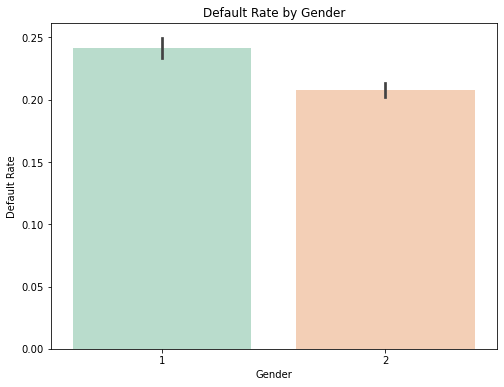

In [104]:
# Default rate by gender is as below

plt.figure(figsize=(8,6))
sns.barplot(data=credit, x='SEX', y='DEFAULT', palette='Pastel2')
plt.title("Default Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Default Rate")
plt.show()


In [105]:
# Turns out, Males (gender=1) have a higher default rate in general. 

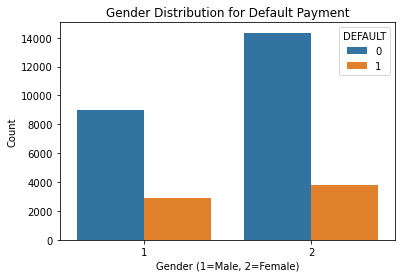

In [106]:
# Gender Distribution:
sns.countplot(x='SEX', hue='DEFAULT', data=credit)
plt.title('Gender Distribution for Default Payment')
plt.xlabel('Gender (1=Male, 2=Female)')
plt.ylabel('Count')
plt.show()

### Data Analysis

Finally, we perform data analysis to answer the questions given in the assignment. 

In [107]:
# Default rate by "education level"
edu_default_rate = credit.groupby('EDUCATION')['DEFAULT'].mean().reset_index(name='DEFAULT_RATE')
print("Default rate by Education level: \n", edu_default_rate)


Default rate by Education level: 
   EDUCATION  DEFAULT_RATE
0         0      0.000000
1         1      0.192348
2         2      0.237349
3         3      0.251576
4         4      0.056911
5         5      0.064286
6         6      0.156863


In [108]:
# Default rate amongst individuals with education marked as 'high school' (category 3) is the highest amongst all categories.
# This is closely followed by category 2 which is education marked as 'university'

In [109]:
# Default rate by "marital status" is as follows
mar_default_rate = credit.groupby('MARRIAGE')['DEFAULT'].mean().reset_index(name='DEFAULT_RATE')
print("\nDefault rate by Marital status: \n", mar_default_rate)


Default rate by Marital status: 
   MARRIAGE  DEFAULT_RATE
0        0      0.092593
1        1      0.234717
2        2      0.209283
3        3      0.260062


In [110]:
# Default rate amongst married (category 1) > Default rate amongst singles (category 2)
# Default rate amongst 'others' (category 3) is the highest amongst all 3 categories

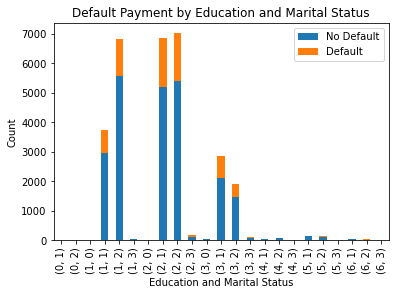

In [111]:
# Stacked Bar Plot for Education and Marital Status:

edu_marriage = pd.crosstab(index=[credit['EDUCATION'],credit['MARRIAGE']], columns=[credit['DEFAULT']])
edu_marriage.columns = ['No Default', 'Default']
edu_marriage.plot(kind='bar', stacked=True)
plt.title('Default Payment by Education and Marital Status')
plt.xlabel('Education and Marital Status')
plt.ylabel('Count')
plt.show()


In [112]:
# Observation - User data has significantly higher composition of the folowing three combinations:
# (2,2) = (university, single) 
# (2,1) = (university, married)
# (1,2) = (graduate school, single)

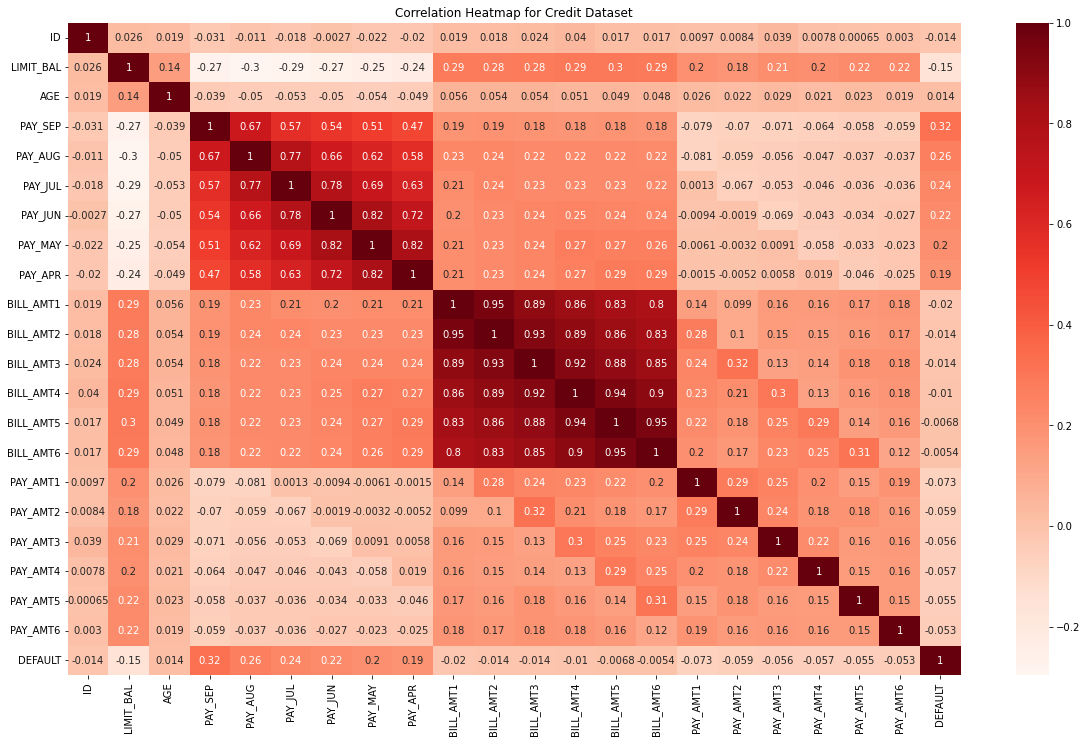

In [113]:
# Heatmap for Correlation b/w Variables:

plt.figure(figsize=(20, 12))
corr = credit.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Heatmap for Credit Dataset')
plt.show()

In [114]:
# DEFAULT has a high correlation with 'PAY_SEP'. This should also be reflected in the feature importance matrix

FEATURE IMPORTANCE: To determine which variables are the strongest predictors of default payment, we can use a machine learning algorithm like Random Forest Classifier. 

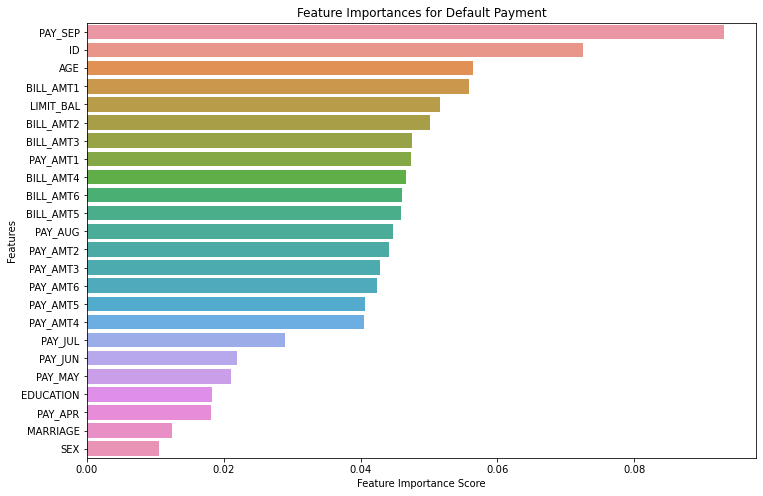

In [115]:
X = credit.drop('DEFAULT', axis=1)
y = credit['DEFAULT']

# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y)

# Get the feature importances in descending order
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot 
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances for Default Payment')
plt.show()


In [116]:
# PAY_SEP explains the most variance in DEFAULT
# Amongst the demographics, the order of importance in explaining the variance in DEFAULT is "AGE >>> EDUCATION > MARRIAGE > SEX"

Effect of Payment Delays on Default Payment Rate: 

While exploring the relationship between demographic variables and default payment, we can also investigate the impact of payment delays on default payment rate. To do this, we can group the data ON MONTHLY BASIS by payment delays and calculate the average default payment rate for each group.

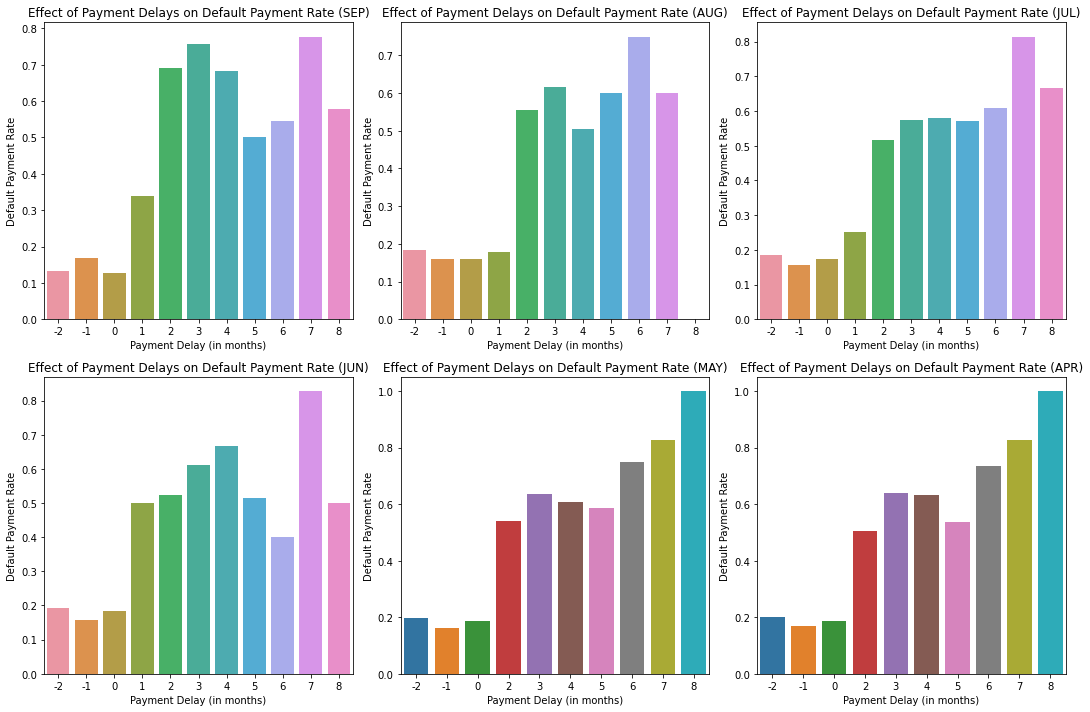

In [117]:
# Subplots for each month
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
axes = axes.flatten()

# Iterate through each month and plot
for i, month in enumerate(['PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']):
    pay_delay_groups = credit.groupby([month])['DEFAULT'].mean()
    ax = sns.barplot(x=pay_delay_groups.index, y=pay_delay_groups.values, ax=axes[i])
    ax.set_xlabel('Payment Delay (in months)')
    ax.set_ylabel('Default Payment Rate')
    ax.set_title(f'Effect of Payment Delays on Default Payment Rate ({month[4:]})')

# Hide extra subplots
for i in range(len(axes)):
    if i >= 6:
        axes[i].axis('off')
        
plt.tight_layout()
plt.show()


In [118]:
# The data is first grouped by the payment delay in every month. 
# Then, for each group of payment delay, the mean default payment rate is calculated.

# For every month, users with a payment delay of 2, 3, 7 or 8 months have the highest default probabilities.

*****